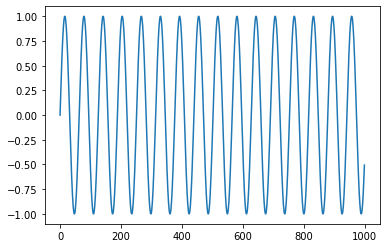

Train on 1 samples
Epoch 1/10
1/1 [==============================] - 0s 451ms/sample - loss: 0.7580 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 0.7484 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 4ms/sample - loss: 0.7407 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 7ms/sample - loss: 0.7310 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 5ms/sample - loss: 0.7218 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 5ms/sample - loss: 0.7198 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 4ms/sample - loss: 0.7065 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 7ms/sample - loss: 0.6954 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 3ms/sample - loss: 0.6871 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 5ms/sam

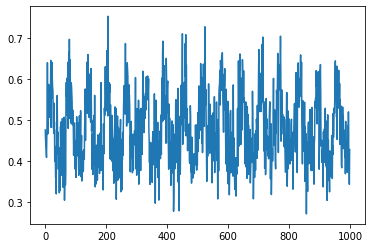

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate a sample sin wave
X = np.array([np.linspace(0,100,1000)])
y = np.sin(X)

# Plot the sample sin wave
plt.plot(y[0])
plt.show()

# Define a model to fit the above data
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1000, activation='sigmoid')
])

# Compile the model
model.compile(loss='mse',
            optimizer='adam',
            metrics=['accuracy'])

# Fit the model
model.fit(X,y, epochs=10)

# Get the prediction
y_hat = model.predict(X)

# Plot the results
plt.plot(y_hat[0])
plt.show()

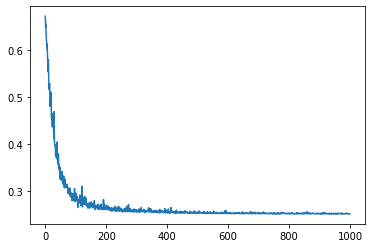

In [30]:
class LossHistory(tf.keras.callbacks.Callback):
    
    def __init__(self):
        self.losses = []
        self.val_losses = []
         
    def on_epoch_end(self,batch,logs={}): 
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))         
                
history = LossHistory()

model.fit(X,
          y,
          verbose=0,
          epochs=1000,
          callbacks=[history])


plt.plot(history.losses)
plt.plot(history.val_losses)
plt.show()
